## Discrete Probability Distributions

`apt-get install liblzma-dev`

Example 1.1 Generate 20 random numbers

In [1]:
import random
import numpy as np
import pandas as pd
from src.visualization.latex import *

In [2]:
[random.random() for _ in range(20)]

[0.05399775252749539,
 0.5631805039167248,
 0.01945459951978168,
 0.8988389131480808,
 0.14778046366599473,
 0.014648061437917193,
 0.9526874457188438,
 0.28953267501771185,
 0.3065078411887674,
 0.9232856748516536,
 0.56308553881074,
 0.06761440915520334,
 0.45573280797862503,
 0.6923952652259066,
 0.8585381576294195,
 0.11500318055865855,
 0.7192118866330898,
 0.568641326940761,
 0.05565429097111485,
 0.6485245546448424]

In [3]:
newline.join(
    space.join(text(v) for v in vs)
    for vs in np.random.uniform(0, 1, (5, 4))
) >> render

<IPython.core.display.Latex object>

Example 1.2 Generate 20 random coin tosses

In [4]:
space.join(text("H" if v < 0.5 else "T") for v in np.random.uniform(0, 1, 20)) >> render

<IPython.core.display.Latex object>

Example 1.3 Chevalier de Mere and his dice

Example 1.3.1 Does a six turn up at least once in four rolls of a fair die

In [5]:
e131_dice_df = pd.DataFrame(data=np.random.randint(1, 6 + 1, size=(1000, 4)))
e131_dice_df.head()

0  1  2  3
0  6  5  2  6
1  3  1  5  4
2  1  3  2  3
3  3  4  3  2
4  5  4  1  6

In [6]:
e131_has_6_mask = e131_dice_df.isin([6]).any(axis=1)

len(e131_dice_df[e131_has_6_mask]) / len(e131_dice_df)

0.524

In [7]:
e131_dice_df = pd.DataFrame(data=np.random.randint(1, 6 + 1, size=(10000, 4)))
e131_has_6_mask = e131_dice_df.isin([6]).any(axis=1)
len(e131_dice_df[e131_has_6_mask]) / len(e131_dice_df)

0.5224

Example 1.3.2 Does a pair of sixes turn up at least once in N rolls of pairs of dice?
Start with 24 and 25

In [8]:
e132_24_dice = data=np.random.randint(1, 6 + 1, size=(1000, 24, 2))

In [9]:
e132_24_dice[1]

array([[2, 2],
       [5, 6],
       [1, 3],
       [4, 5],
       [4, 3],
       [6, 3],
       [1, 2],
       [6, 3],
       [6, 5],
       [1, 4],
       [6, 4],
       [4, 1],
       [6, 5],
       [2, 2],
       [3, 2],
       [1, 1],
       [3, 5],
       [4, 1],
       [5, 1],
       [1, 1],
       [5, 1],
       [1, 2],
       [3, 5],
       [3, 4]])

In [10]:
(e132_24_dice == 6)[1]

array([[False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [ True, False],
       [ True, False],
       [False, False],
       [ True, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [11]:
(e132_24_dice == 6).all(2)[1]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [12]:
(e132_24_dice == 6).all(2).any(1)[1]

False

In [13]:
(e132_24_dice == 6).all(2).any(1).sum() / len(e132_24_dice)

0.508

In [14]:
e132_25_dice = data=np.random.randint(1, 6 + 1, size=(1000, 25, 2))
(e132_25_dice == 6).all(2).any(1).sum() / len(e132_25_dice)

0.497

It is stated that you need at least 27,000 rolls to determine that 25 dice rolls is enough to win

In [15]:
e132_24_27k_dice = data=np.random.randint(1, 6 + 1, size=(27000, 24, 2))
(e132_24_27k_dice == 6).all(2).any(1).sum() / len(e132_24_27k_dice)

0.48733333333333334

In [16]:
e132_25_27k_dice = data=np.random.randint(1, 6 + 1, size=(27000, 25, 2))
(e132_25_27k_dice == 6).all(2).any(1).sum() / len(e132_25_27k_dice)

0.503

Example 1.4 Heads or Tails for a penny

In [17]:
e14_df = pd.Series(np.random.randint(0, 2, size=40)).to_frame()
e14_df = e14_df.rename({0: 'winnings'}, axis=1)
e14_df['winnings'] = e14_df['winnings'].apply(lambda v: v if v else -1)
e14_df.head()

winnings
0        -1
1        -1
2        -1
3        -1
4        -1

In [18]:
e14_df.cumsum().plot() ; None

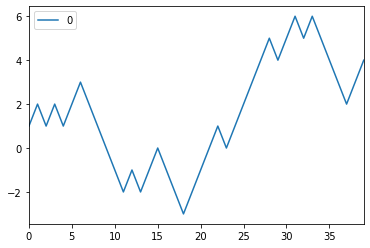

In [19]:
e14_np = np.random.randint(0, 2, size=40)
e14_np[e14_np == 0] = -1
pd.Series(e14_np.cumsum()).to_frame().plot() ; None

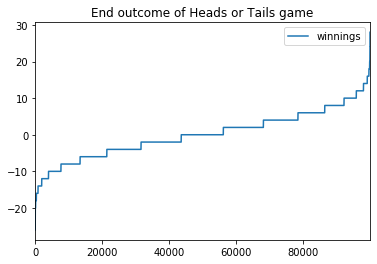

In [20]:
e14_np = np.random.randint(0, 2, size=(100_000, 40))
e14_np[e14_np == 0] = -1
e14_np = e14_np.sum(1)
e14_np.sort()
pd.Series(e14_np).to_frame().rename(columns={0: 'winnings'}).plot(title="End outcome of Heads or Tails game") ; None

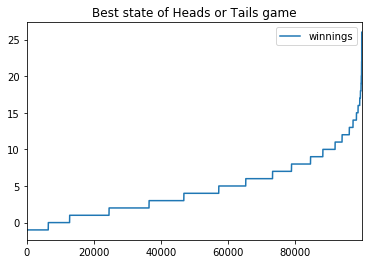

In [21]:
e14_np = np.random.randint(0, 2, size=(100_000, 40))
e14_np[e14_np == 0] = -1
e14_np = e14_np.cumsum(1).max(1)
e14_np.sort()
pd.Series(e14_np).to_frame().rename(columns={0: 'winnings'}).plot(title="Best state of Heads or Tails game") ; None

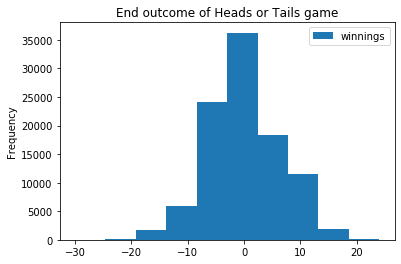

In [22]:
e14_np = np.random.randint(0, 2, size=(100_000, 40))
e14_np[e14_np == 0] = -1
e14_np = e14_np.sum(1)
e14_np.sort()
pd.Series(e14_np).to_frame().rename(columns={0: 'winnings'}).plot(kind='hist', title="End outcome of Heads or Tails game") ; None

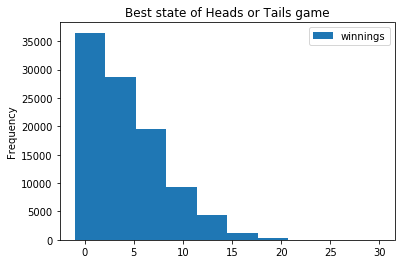

In [23]:
e14_np = np.random.randint(0, 2, size=(100_000, 40))
e14_np[e14_np == 0] = -1
e14_np = e14_np.cumsum(1).max(1)
e14_np.sort()
pd.Series(e14_np).to_frame().rename(columns={0: 'winnings'}).plot(kind='hist', title="Best state of Heads or Tails game") ; None

Example 1.5 Horse Races

In [26]:
e15_horses = [
    'acorn',
    'balky',
    'chestnut',
    'dolby',
]

In [37]:
def e15_horse_race(size: int) -> pd.DataFrame:
    df = (
        pd.Series(np.random.random(size=size))
            .to_frame()
            .rename(columns={0: 'roll'})
    )
    df['acorn'] = df['roll'] < .3
    df['balky'] = (.3 <= df['roll']) & (df['roll'] < .7)
    df['chestnut'] = (.7 <= df['roll']) & (df['roll'] < .9)
    df['dolby'] = .9 <= df['roll']
    return df

In [38]:
e15_df = e15_horse_race(10)

In [39]:
def e15_display(df: pd.DataFrame) -> Latex:
    entries = len(df)
    horses = [
        P(horse)
        for horse in e15_horses
    ]
    fractions = [
        expression.eq << frac(df[horse].sum(), entries)
        for horse, expression in zip(e15_horses, horses)
    ]
    decimals = [
        expression.eq << text(df[horse].sum() / entries)
        for horse, expression in zip(e15_horses, fractions)
    ]
    return newline.join(decimals) >> align >> render

In [40]:
e15_display(e15_df)

<IPython.core.display.Latex object>

In [41]:
e15_df = e15_horse_race(1000)
e15_display(e15_df)

<IPython.core.display.Latex object>

---

**Excersize 1**

Modify the program CoinTosses to toss a coin n times and print out after
every 100 tosses the proportion of heads minus 1/2. Do these numbers appear
to approach 0 as n increases? Modify the program again to print out, every
100 times, both of the following quantities: the proportion of heads minus 1/2,
and the number of heads minus half the number of tosses. Do these numbers
appear to approach 0 as n increases?

In [80]:
def ex1_coin_tosses(size: int) -> pd.DataFrame:
    df = pd.DataFrame({'round': np.ones(size).astype(np.int64), 'score': np.random.random(size)})
    df['heads'] = df['score'] >= .5
    df['heads'] = df['heads'].astype(np.int64)
    df = df.drop('score', axis=1)
    df = df.cumsum()
    df['proportion'] = (df['heads'] / df['round']) - 0.5
    df['minus'] = df['heads'] - (df['round'] / 2)
    return df

In [81]:
ex1_df = ex1_coin_tosses(100)
ex1_df.head()

round  heads  proportion  minus
0      1      0   -0.500000   -0.5
1      2      1    0.000000    0.0
2      3      2    0.166667    0.5
3      4      3    0.250000    1.0
4      5      3    0.100000    0.5

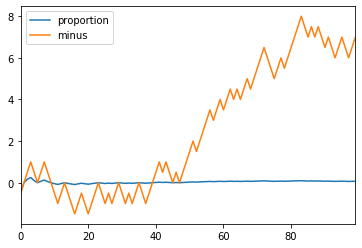

In [83]:
ex1_df.drop(['round', 'heads'], axis=1).plot() ; None

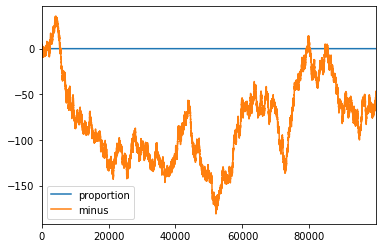

In [84]:
ex1_coin_tosses(100_000).drop(['round', 'heads'], axis=1).plot() ; None

---

**Excersize 2**

Modify the program CoinTosses so that it tosses a coin n times and records
whether or not the proportion of heads is within .1 of .5 (i.e., between .4
and .6). Have your program repeat this experiment 100 times. About how
large must n be so that approximately 95 out of 100 times the proportion of
heads is between .4 and .6?

In [89]:
def ex2_coin_tosses(size: int) -> pd.DataFrame:
    df = pd.DataFrame({'round': np.ones(size).astype(np.int64), 'score': np.random.random(size)})
    df['heads'] = df['score'] >= .5
    df['heads'] = df['heads'].astype(np.int64)
    df = df.drop('score', axis=1)
    df = df.cumsum()
    df['proportion'] = (df['heads'] / df['round']) - 0.5

    df['is close'] = df['proportion'].abs() <= 0.1
    df['is close'] = df['is close'].astype(np.int64)
    df['is close'] = df['is close'].cumsum()
    df['close'] = df['is close'] * 100 / df['round']
    df['95%'] = 95
    df = df.drop(['round', 'heads', 'proportion', 'is close'], axis=1)
    return df

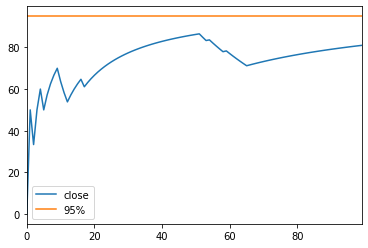

In [92]:
ex2_coin_tosses(100).plot() ; None

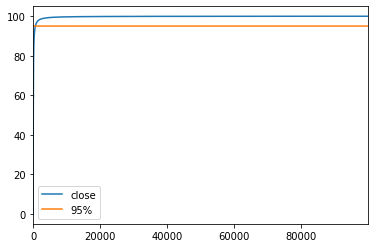

In [93]:
ex2_coin_tosses(100_000).plot() ; None

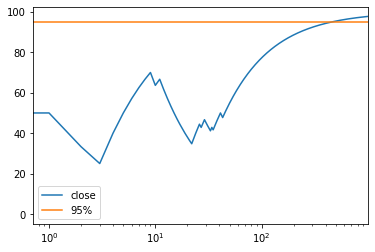

In [96]:
ex2_coin_tosses(1000).plot(logx=True) ; None

Over $10^{2}$ rounds are required to reach 95%.
I don't really have any tools to determine a more exact value at this time.
I think this is to do with p-values.

---

**Excersize 3**

In the early 1600s, Galileo was asked to explain the fact that, although the
number of triples of integers from 1 to 6 with sum 9 is the same as the number
of such triples with sum 10, when three dice are rolled, a 9 seemed to come
up less often than a 10—supposedly in the experience of gamblers.

(a) Write a program to simulate the roll of three dice a large number of
times and keep track of the proportion of times that the sum is 9 and
the proportion of times it is 10.

(b) Can you conclude from your simulations that the gamblers were correct?

In [99]:
def ex3_three_dice(size: int) -> pd.DataFrame:
    roll = lambda: np.random.randint(1, 6+1, size)
    df = pd.DataFrame({
        'round': np.ones(size).astype(np.int64), 
        'score': roll() + roll() + roll(),
    })
    df['is 9'] = df['score'] == 9
    df['is 9'] = df['is 9'].astype(np.int64)
    df['is 10'] = df['score'] == 10
    df['is 10'] = df['is 10'].astype(np.int64)
    df = df.cumsum()
    df['9 chance'] = df['is 9'] / df['round']
    df['10 chance'] = df['is 10'] / df['round']
    return df

In [100]:
ex3_three_dice(100).head()

round  score  is 9  is 10  9 chance  10 chance
0      1     10     0      1       0.0   1.000000
1      2     21     0      1       0.0   0.500000
2      3     39     0      1       0.0   0.333333
3      4     46     0      1       0.0   0.250000
4      5     58     0      1       0.0   0.200000

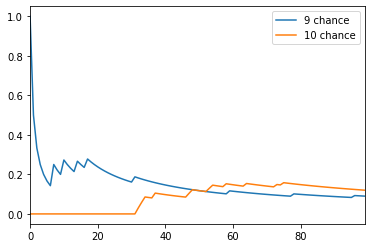

In [101]:
ex3_three_dice(100).drop(['round', 'score', 'is 9', 'is 10'], axis=1).plot() ; None

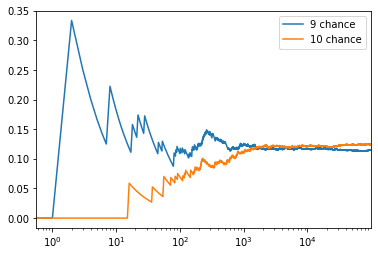

In [104]:
ex3_three_dice(100_000).drop(['round', 'score', 'is 9', 'is 10'], axis=1).plot(logx=True) ; None

As an offhand remark, when playing board games the average roll of a single die is $3.5$, and for two dice it is $7$. From this progression it is natural that the average of three dice is $10.5$ which would make $10$ more common than $9$.